In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

netflix_db = pd.read_csv(r'C:\\Users\\PC\\Downloads\\Netflix.csv')

## Data Cleaning

In [77]:
netflix_db.head() 
netflix_db.sample(10) #looking over data points to see anything we may need to check and clean

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
536,s537,Movie,Ankhon Dekhi,Rajat Kapoor,"Sanjay Mishra, Seema Pahwa, Rajat Kapoor, Taranjit Kaur, Maya Sarao, Chandrachoor Rai, Namit Das, Brijendra Kala, Alka Chawla, Manu Rishi Chadha",India,"September 28, 2020",TV-PG,104 min,"Dramas, Independent Movies, International Movies","After a distressing incident, a Delhi man vows to believe only what he can see, but his new ideals soon take his life in extreme directions.",2020-09-28,104 min,104.0,NaN,NaN
7483,s7482,Movie,Warda,Hadi El Bagoury,"Nada Al Alfi, Bassel El Kadi, Samira Maqroun, Tareq Abdalla, Ahmed Awni, Emad Ghoniem, Abeer Mansour, Youssef Mohamed",Egypt,"April 18, 2019",TV-14,73 min,"Horror Movies, Independent Movies, International Movies","When an aspiring documentarian returns to his hometown to investigate paranormal happenings, his girlfriend's mental health takes a troubling turn.",2019-04-18,73 min,73.0,NaN,NaN
2641,s2642,Movie,Hasan Minhaj: Homecoming King,Christopher Storer,Hasan Minhaj,NaN,"May 23, 2017",TV-MA,73 min,Stand-Up Comedy,"Comic Hasan Minhaj of ""The Daily Show"" shares personal stories about racism, immigrant parents, prom night horrors and more in this stand-up special.",2017-05-23,73 min,73.0,NaN,NaN
2469,s2470,Movie,Gollu Aur Pappu,Kabir Sadanand,"Vir Das, Sandeepa Dhar, Dimple Kapadia, Kunaal Roy Kapur, Deepak Tijori",India,"July 5, 2020",TV-14,112 min,"Action & Adventure, Comedies, International Movies","Hapless brothers Gollu and Pappu stumble into a terrorist plot and end up being ordered to detonate a bomb, a task they are destined to bungle.",2020-07-05,112 min,112.0,NaN,NaN
5499,s5499,Movie,Sergio,Greg Barker,"Wagner Moura, Ana de Armas, Brían F. O'Byrne, Clemens Schick, Bradley Whitford",United States,"April 17, 2020",R,119 min,"Dramas, Independent Movies","Passions, ideals and bitter realities collide as charismatic UN diplomat Sergio Vieira de Mello becomes trapped in a life-threatening situation in Iraq.",2020-04-17,119 min,119.0,NaN,NaN
2119,s2120,Movie,Fashion,Madhur Bhandarkar,"Priyanka Chopra, Kangana Ranaut, Mugdha Godse, Arbaaz Khan, Arjan Bajwa, Raj Babbar, Kiran Juneja, Samir Soni",India,"August 2, 2018",TV-MA,158 min,"Dramas, International Movies",A small-town girl finally realizes her dream of becoming a famous supermodel but soon finds there's a price for her glamorous new life.,2018-08-02,158 min,158.0,NaN,NaN
1888,s1889,Movie,Duck Duck Goose,Chris Jenkins,"Jim Gaffigan, Zendaya, Lance Lim, Greg Proops, Reggie Watts, Carl Reiner, Jennifer Grey, Stephen Fry, Diedrich Bader, Natasha Leggero, Craig Ferguson, Rick Overton","China, United States, United Kingdom","July 20, 2018",PG,92 min,"Children & Family Movies, Comedies","As his flock's annual migration nears, a carefree goose is grounded with an injury and takes a pair of lost ducklings under his wing.",2018-07-20,92 min,92.0,NaN,NaN
594,s595,Movie,Asees,Rana Ranbir,"Rana Ranbir, Neha Pawar, Kuljinder Sidhu, Rupinder Roopi, Sardar Sohi, Pardeep Sran, Seema Kaushal, Rajvir Boparai",India,"November 1, 2018",TV-14,123 min,"Dramas, International Movies, Music & Musicals","When a dispute breaks out between five siblings over their mother’s property, one devoted son will go to any lengths to protect her land.",2018-11-01,123 min,123.0,NaN,NaN
7179,s7178,TV Show,Trailer Park Boys: The Animated Series,"Norm Hiscock, Gary Howsam, Mike Smith, John Paul Tremblay, Robb Wells","Mike Smith, John Paul Tremblay, Robb Wells, John Dunsworth, Pat Roach, Cory Bowles, Jacob Rolfe, Tyrone Parsons, Sarah Dunsworth, Jeanna Harrison, Marguerite McNeil",Canada,"May 22, 2020",TV-MA,2 Seasons,TV Comedies,"Nova Scotia’s favorite miscreants have always been super sketchy. Now, carrying on from the Season 12 finale, the boys have become complete cartoons.",2020-05-22,NaN,NaN,2 Seasons,2.0
3451,s3452,Movie,Krish Trish and Baltiboy: The Greatest Trick,"Munja

In [4]:
netflix_db.isnull().any() #checking which columns have nulls

Show_Id         False
Category        False
Title           False
Director         True
Cast             True
Country          True
Release_Date     True
Rating           True
Duration        False
Type            False
Description     False
dtype: bool

In [5]:
nas = netflix_db[netflix_db['Director'].isna()==1]
print(len(nas)) #because there are a lot of nas and they are primarily for Categorical values, we won't be dropping
#them in our primary df but rather creating a new df where we will drop those values for any categorical analysis

2388


In [6]:
#Copy of original df, with removed nulls
netflix_nonull = netflix_db.copy()

In [7]:
#dropping nulls
netflix_nonull.dropna(inplace=True)

In [8]:
#verifying removal of nulls
netflix_nonull.isnull().any()
len(netflix_nonull)

4811

In [9]:
#Dropping duplicates
netflix_db.drop_duplicates(inplace=True)
netflix_db[netflix_db.duplicated()] #verifying if any duplicates remain

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [10]:
netflix_db.head(2) #keeping release_date column for data verification purposes until end

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [11]:
netflix_db.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [12]:
netflix_db['Rating'].head()
#All Datatypes are adding up, everything besides Dates is an object (Dates is a converted Datetime column for Release Dates)

0    TV-MA
1    TV-MA
2        R
3    PG-13
4    PG-13
Name: Rating, dtype: object

## Section 1: Gathering Basic Information About Dataset

In [13]:
netflix_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


## Section 2: Cleaning Data

In [14]:
#Task 1: Determine if there are any duplicate records, if so delete them
#First bring up the shape of our current dataset
netflix_db.shape #we have 7789 rows and 11 columns

#now see how many values are duplicated by running the code below as an index in netflix_db (only finding TRUE duplicated values)
netflix_db.duplicated()
netflix_db[netflix_db.duplicated()] #we see two results
netflix_db.drop_duplicates(inplace=True) #drops duplicates from dataset permanently
netflix_db.shape #verifies two rows were dropped or use netflix_db[netflix_db.duplicated()] and its 0 results

(7787, 11)

In [15]:
#Task 2: Identify if there are any null values. If so, map them with a heatmap (using Seaborn)
netflix_db.head() #its always a good idea to use head() as a reference to your initial data before any queries for reference
netflix_db.isnull() #any True values from this query mean there is a null value
netflix_db.isnull().sum() #shows number of null values in each column

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

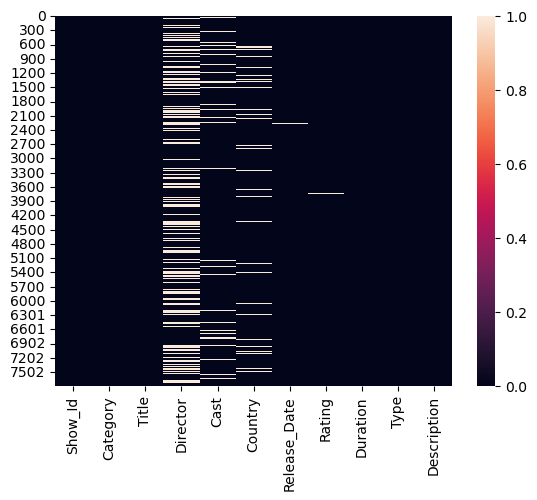

In [16]:
#Making a heat map with null values (the more white area per column the more null values are present)
sns.heatmap(netflix_db.isnull()) #cross reference the heatmap values with the sum of values above to make sure it aligns

## Section 3: 


## Data Discovery

In [17]:
# Q1) What is the Show ID for 'House of Cards' and its director
#Method 1
netflix_db.head()
pd.set_option('display.max_colwidth', None) #allows view for full column
netflix_db[netflix_db['Title'].isin(['House of Cards'])][['Show_Id','Director']]

#can also use the method below 
netflix_db[netflix_db['Title'].str.contains('House of Cards')][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson"


In [18]:
#Q2 Which year had the highest number of TV Shows and Movies? Show with Bar Graph


In [19]:
#Confirming Datatypes
netflix_db.dtypes #we see our release date column has an object data type, lets see why
unique_release_dates = netflix_db['Release_Date'].unique()
#print(list(unique_release_dates)) #don't seem to see any input errors so we will turn this into datetime
netflix_db['Dates'] = pd.to_datetime(netflix_db['Release_Date'],errors='coerce') #making new column with converted Release Date
#Below this we see the steps we took to clean and verify our data in the new column

total_shows_movies = netflix_db['Dates'].dt.year.value_counts() #calculates value counts per year
total_shows_movies #Visualized as a bar chart below

Dates
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

In [20]:
netflix_db.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,2020-01-01


In [21]:
condition = netflix_db['Dates'].isna()

In [22]:
netflix_db['Release_Date'] = netflix_db['Release_Date'].str.strip()

In [23]:
#checking each value to find the problematic value in "August 4, 2017" and see why it is causing issues
for date_string in netflix_db['Release_Date'].unique():
    print(repr(date_string))

'August 14, 2020'
'December 23, 2016'
'December 20, 2018'
'November 16, 2017'
'January 1, 2020'
'July 1, 2017'
'June 1, 2020'
'November 1, 2019'
'April 1, 2019'
'December 15, 2017'
'October 20, 2017'
'November 30, 2018'
'May 17, 2019'
'March 1, 2019'
'March 19, 2020'
'September 1, 2019'
'March 20, 2019'
'October 10, 2018'
'March 29, 2019'
'May 16, 2018'
'September 1, 2018'
'September 15, 2018'
'January 23, 2020'
'June 30, 2016'
'August 12, 2020'
'September 8, 2020'
'July 1, 2020'
'April 17, 2020'
'February 5, 2020'
'May 21, 2020'
'June 28, 2020'
'September 8, 2017'
'April 10, 2019'
'December 1, 2016'
'June 1, 2019'
'March 30, 2019'
'July 19, 2019'
'March 10, 2017'
'March 27, 2018'
'October 2, 2020'
'February 1, 2018'
'January 17, 2017'
'July 7, 2017'
'October 18, 2019'
'December 7, 2020'
'July 6, 2018'
'March 13, 2020'
'November 2, 2019'
'March 20, 2018'
'January 7, 2021'
'March 14, 2019'
'May 22, 2017'
'August 13, 2016'
'June 5, 2020'
'August 23, 2019'
'January 13, 2019'
'October 7, 2

In [24]:
#indexing for all nan values in the new column and fixing those with actual dates that got mislabelled NaN
netflix_db.loc[condition, 'Dates'] = pd.to_datetime(netflix_db.loc[condition,'Release_Date'],format='mixed')

In [25]:
netflix_db[netflix_db['Dates'].isna()] #verified that all NaN values are legitimate


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Christopher Godwin, Rosie Cavaliero, Vicki Pepperdine, Margaret Clunie, Tim Steed, Shaun Pye",United Kingdom,NaN,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic miniseries is based on a doctor's memories of his early career working in an out-of-the-way village.",NaT
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bourdain traveling to extraordinary locations around the globe to sample a variety of local cuisines.,NaT
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce, Peri Gilpin, John Mahoney, Dan Butler",United States,NaN,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle psychiatrist who dispenses advice on his call-in radio show while ignoring it in his own relationships.,NaT
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry, David Schwimmer",United States,NaN,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies","This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan.",NaT
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Ami Koshimizu, Hidenobu Kiuchi, Mitsuru Miyamoto, Masashi Ebara, Norihiro Inoue, Rie Nakagawa, Masami Iwasaki, Laura Bailey, Luci Christian, Caitlin Glass, Alese Johnson, Monica Rial, Jerry Jewell, Stephanie Young, Mike McFarland",Japan,NaN,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appears to help orphaned schoolgirls, but it's actually turning them into lethal agents.",NaT
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,"A wacky rabbit and his gang of animal pals have fun solving problems, sharing stories and exploring their sometimes magical, always special world.",NaT
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Ávila, Regina Blandón, Miguel Perez, Barbara Torres, Dalilah Polanco, Pierre Angelo",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Shows, TV Comedies","This irreverent sitcom featues Ludovico, Federica and their three children Bibi, Junior and Ludoviquito, living in Ciudad P. Luche.",NaT
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zehetner, Andy Kindler",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews fellow comedians for his popular podcast, only to reveal more about his own neuroses and relationships.",NaT
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, Geoff Lazer Ramsey, Joel Heyman, Matt Hullum, Dan Godwin, Kathleen Zuelch, Yomary Cruz, Nathan Zellner",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy","This parody of first-person shooter games, military life and science-fiction films centers on a civil war fought in the middle of a desolate canyon.",NaT
6066,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Hamlyn, Stavroula Mountzouris, Aletheia Burney",Australia,NaN,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: Figaro is a boy with any number of phobias and a highly quirky and imaginative way of dealing with them.",NaT


<Axes: xlabel='Dates'>

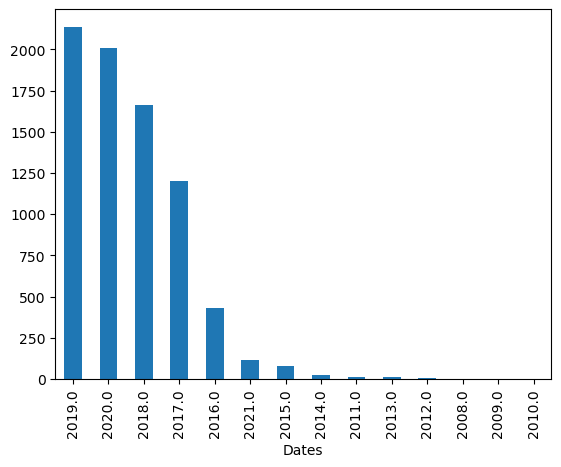

In [35]:
total_shows_movies.plot(kind='bar')

In [36]:
#Question 3: How many Movies/Tv shows are in this dataset? (Bar Graph)

In [37]:
netflix_db.groupby('Category').Category.count() #gets count for both movies and tv shows (just one column which is .Category)

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

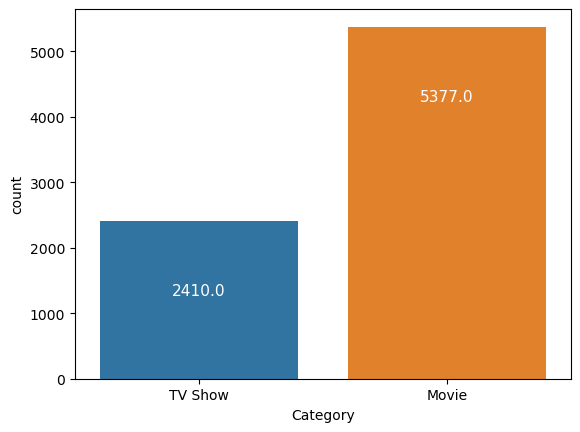

In [38]:
#Bar chart with labels
ax = sns.countplot(x=netflix_db['Category'],data=netflix_db)

#Adding labels to chart
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha='center', va='center', fontsize=11, color='white', xytext=(0, -50),
                textcoords='offset points')
    


In [74]:
#Question 4: Show all movies released in Year 2020

netflix_db[(netflix_db['Dates'].dt.year==2020) & (netflix_db['Category']=='Movie')].head()
#print(netflix_db[(netflix_db['Dates'].dt.year==2020) & (netflix_db['Category']=='Movie')].shape)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,2020-01-01,123 min,123.0,NaN,NaN
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed El Fishawy, Mahmoud Hijazi, Jihane Khalil, Asmaa Galal, Tara Emad",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before death finds them.",2020-06-01,95 min,95.0,NaN,NaN
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus Macfadyen, Jorja Fox, Enver Gjokaj, Haaz Sleiman",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers","Stranded when the Earth is suddenly destroyed in a mysterious cataclysm, the astronauts aboard a marooned space station slowly lose their minds.",2020-03-19,91 min,91.0,NaN,NaN
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man stays locked inside his apartment, digitally cut off from seeking help and desperate to find a way out.",2020-09-08,99 min,99.0,NaN,NaN
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retold alongside those of five Holocaust survivors in this poignant documentary from Oscar winner Helen Mirren.",2020-07-01,95 min,95.0,NaN,NaN


In [40]:
#Question 5: Show only the Names of TV Shows that were released in Canada only
canadian_shows = netflix_db[(netflix_db['Category']=='TV Show') & (netflix_db['Country']=='Canada')]['Title']
print('# of Canadian Shows:',len(canadian_shows))
canadian_shows

# of Canadian Shows: 59


87                                      21 Thunder
389                                    Alias Grace
539                                 Anne with an E
685                                      Bad Blood
783                                  Beast Legends
791                             Beauty & the Beast
862                                        Between
940                                         Bitten
994                                     Blown Away
1010                                 Bo on the Go!
1047         Border Security: America's Front Line
1189                                        Camp X
1192                              Can You Hear Me?
1291                              Chasing Monsters
1616                                   Dark Matter
1687                          Degrassi: Next Class
1768                                     Dino Hunt
2044                               Ever After High
2112                                      Fangbone
2298                           

In [41]:
#Question 6: Top 10 Directors in terms of total number of tv shows and movies produced
netflix_db['Director'].value_counts()[0:9] #or can use head(10) in place of index

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Name: count, dtype: int64

In [70]:
# Question 7: Show all Records where Category is TV Show AND Type is comedy OR Country is United Kingdom
#pd.set_option('display.max_rows',None) to see all rows and verify we got all the data we are looking for
netflix_db[(netflix_db['Category']=='TV Show') & (netflix_db['Type']=='TV Comedies')
           | (netflix_db['Country']== 'United Kingdom')].sort_values('Country').head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
3316,s3317,TV Show,Kath and Kim,NaN,"Jane Turner, Gina Riley, Glenn Robbins, Peter Rowsthorn, Magda Szubanski",Australia,"July 28, 2018",TV-MA,6 Seasons,TV Comedies,"As Kath prepares to wed fine-meats purveyor Kel, her daughter Kim moves back home after becoming disillusioned with her two-month marriage to Brett.",2018-07-28,NaN,NaN,6 Seasons,6.0
621,s622,TV Show,Aunty Donna's Big Ol' House of Fun,NaN,"Mark Samual Bonanno, Broden Kelly, Zachary Ruane, Ed Helms, Kristen Schaal, Weird Al Yankovic, Kia Stevens, Paul F. Tompkins, Tawny Newsome",Australia,"November 11, 2020",TV-MA,1 Season,TV Comedies,"Comedy trio Aunty Donna showcase their uniquely absurd and offbeat style through an array of sketches, songs and eclectic characters.",2020-11-11,NaN,NaN,NaN,NaN
5495,s5495,TV Show,Sensitive Skin,NaN,"Kim Cattrall, Don McKellar, Nicolas Wright, Joanna Gleason, Colm Feore, Clé Bennett, Bob Martin, Elliott Gould",Canada,"December 1, 2019",TV-MA,1 Season,TV Comedies,Davina and Al try to revamp their lives as they struggle with the uncertainties of middle age in this darkly comic adaptation of the British hit.,2019-12-01,NaN,NaN,NaN,NaN
7179,s7178,TV Show,Trailer Park Boys: The Animated Series,"Norm Hiscock, Gary Howsam, Mike Smith, John Paul Tremblay, Robb Wells","Mike Smith, John Paul Tremblay, Robb Wells, John Dunsworth, Pat Roach, Cory Bowles, Jacob Rolfe, Tyrone Parsons, Sarah Dunsworth, Jeanna Harrison, Marguerite McNeil",Canada,"May 22, 2020",TV-MA,2 Seasons,TV Comedies,"Nova Scotia’s favorite miscreants have always been super sketchy. Now, carrying on from the Season 12 finale, the boys have become complete cartoons.",2020-05-22,NaN,NaN,2 Seasons,2.0
3395,s3396,TV Show,Kim's Convenience,NaN,"Paul Sun-Hyung Lee, Jean Yoon, Andrea Bang, Simu Liu, Andrew Phung, Nicole Power",Canada,"April 1, 2020",TV-MA,4 Seasons,TV Comedies,"While running a convenience store in Toronto, members of a Korean-Canadian family deal with customers, each other and the evolving world around them.",2020-04-01,NaN,NaN,4 Seasons,4.0


In [43]:
netflix_db.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",2020-08-14,NaN
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",2016-12-23,93 min


In [44]:
#Question 8: How many movies was Tom Cruise Casted In? 

# Normal filtering like: netflix_db[netflix_db['Cast']=='Carmen Beato'] will not work if we want to find a value 
#within multiple values of a row (one name amongst many in cast)

#we use str.contains for this query (note: we have to use our alternate df which contains no nulls for str.contains to work)
netflix_nonull[netflix_nonull['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, April Grace, Luis Guzmán, Philip Baker Hall, Philip Seymour Hoffman, Ricky Jay, William H. Macy, Alfred Molina, Julianne Moore, Michael Murphy, John C. Reilly, Jason Robards, Melora Walters",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and divine intervention, an eclectic cast of characters weaves and warps through each other's lives."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Gerald R. Molen, Jack Murdock, Michael D. Roberts, Ralph Seymour, Lucinda Jenney, Bonnie Hunt",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas","A fast-talking yuppie is forced to slow down when he meets the brother he never knew he had, an unusually gifted autistic savant named Raymond."


In [45]:
#Question 9: Different Types of Ratings
netflix_db.Rating.nunique() #14 types of ratings
netflix_db.Rating.unique()


array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [46]:
#How many movies got the TV-14 Rating in Canada?
TV14Canada = netflix_db[(netflix_db['Category']=='Movie')&(netflix_db['Rating']=='TV-14')&(netflix_db['Country']=='Canada')]
TV14Canada.shape #11 Rows

(11, 13)

In [47]:
#How many R Rated TV Shows Came Out After 2010?
netflix_db[(netflix_db['Category']=='TV Show')&(netflix_db['Rating']=='R')&(netflix_db['Dates'].dt.year>=2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jason Leigh, Walton Goggins, Demián Bichir, Tim Roth, Michael Madsen, Bruce Dern, James Parks",NaN,"April 25, 2019",R,1 Season,TV Shows,"Trapped at a stagecoach stop as a storm rages outside, two bounty hunters and an outlaw face a gallery of rogues. Features never-before-seen footage.",2019-04-25,NaN


In [48]:
netflix_db['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [49]:
#Question 10: What is the maximum duration of a show or movie on Netflix?
#From our unique values above we see there are values that contain mins and Seasons, we want to remove any values associated
#with seasons and put only the min values as a separate column which we will then strip and turn numeric

# Create a boolean mask to filter rows with 'min' but not 'Season' or 'Seasons'
#We are splitting this column by Mins and removing Seasons in our new column (down below we find a reason to do the opposite)
#which helps us assess which show has the most seasons


min_only_mask = netflix_db['Duration'].str.contains(r'\b\d+\s*min\b', case=False, na=False) & ~netflix_db['Duration'].str.contains(r'\b\d+\s*Seasons?\b', case=False, na=False)

# Create a new column 'Min_Only' with filtered values where the new column only contains rows with X Mins, All Seasons are NaN
netflix_db['Min_Only'] = netflix_db['Duration'][min_only_mask]


netflix_db.sample(2)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only
4927,s4927,TV Show,Power Players,NaN,"Kieran Walton, Carlos Salazar, Greg Chun, Jamieson Price, Reba Buhr, Todd Haberkorn, Landon McDonald, Scott Whyte, Paul Haapaniemi","United States, France","August 1, 2020",TV-Y7,2 Seasons,Kids' TV,A kid transforms into an action figure-sized superhero and teams with his toys in a fight against a villainous robot to save the world.,2020-08-01,NaN
3379,s3380,TV Show,Kill la Kill,NaN,"Ami Koshimizu, Toshihiko Seki, Ryoka Yuzuki, Aya Suzaki, Shinichiro Miki, Tetsu Inada, Nobuyuki Hiyama, Mayumi Shintani, Hiroyuki Yoshino, Romi Park",Japan,"June 15, 2019",TV-MA,1 Season,"Anime Series, International TV Shows","The ""woman with the scissor blade"" – Ryuko Matoi – searches for clues all around the world for the truth behind her father's death.",2019-06-15,NaN


In [50]:
#splitting the min_only column into two columns and removing the new min column
netflix_db['Duration'].unique()

netflix_db[['numberofmins','mins']] = netflix_db['Min_Only'].str.split(' ',expand=True) #expand assigns each split value to new column
netflix_db.drop('mins',axis=1,inplace=True)
netflix_db.sample(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins
7701,s7700,TV Show,Yanxi Palace: Princess Adventures,NaN,"Wang Herun, Wang Yizhe, Wang Yuwei, Xu Xiaonuo, Wu Jinyan, Nie Yuan",China,"December 31, 2019",TV-14,1 Season,"International TV Shows, TV Dramas",A determined Qing dynasty princess contends with palace intrigue and a vendetta against her family while navigating the treacherous terrain of romance.,2019-12-31,NaN,NaN
1853,s1854,Movie,Dragonheart: Vengeance,Ivan Silvestrini,"Joseph Millson, Jack Kane, Helena Bonham Carter, Arturo Muselli, Carolina Carlsson, Tam Williams, Richard Ashton, Ross O'Hennessy, Cameron Jack, Fabienne Piolini-Castle",United States,"February 4, 2020",PG-13,97 min,"Action & Adventure, Sci-Fi & Fantasy","When his family is slain by vicious savages, a young farmer teams with an ice-breathing dragon and sword-wielding mercenary to avenge their deaths.",2020-02-04,97 min,97


In [51]:
#finding the answer for TV Show with longest duration
netflix_db['numberofmins']= pd.to_numeric(netflix_db['numberofmins'],errors = 'coerce')
netflix_db['numberofmins'].dtypes

dtype('float64')

In [52]:
netflix_db['numberofmins'].max() #max amount of a show or movie is 312 mins or 5.2 hours

312.0

In [53]:
netflix_db[netflix_db['numberofmins']==312.0] #finding row with longest duration (double checking its validation)
# It appears Black Mirror had a movie with 5 alternate endings which made up for 312 minutes of total showtime

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson, Alice Lowe, Asim Chaudhry",United States,"December 28, 2018",TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question reality as he adapts a dark fantasy novel into a video game. A mind-bending tale with multiple endings.",2018-12-28,312 min,312.0


In [69]:
#looking into Shows with longest duration, we see that they all have seasons attached. 
netflix_db[netflix_db['Category']=='TV Show'] #we now have to create a separate column just for TV Seasons

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",2020-08-14,NaN,NaN,4 Seasons,4.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan, Saygın Soysal, Berkan Şal, Metin Belgin, Ayça Eren, Selin Uludoğan, Özay Fecht, Suna Yıldızoğlu",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries","A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.",2017-07-01,NaN,NaN,NaN,NaN
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina Olszańska, Andrzej Chyra, Clive Russell, Zofia Wichłacz, Edyta Olszówka, Mateusz Kościukiewicz, Ewa Błaszczyk, Vu Le Hong, Tomasz Włosok, Krzysztof Wach","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law student and a world-weary detective uncover a conspiracy that has tyrannized Poland for decades.",2018-11-30,NaN,NaN,NaN,NaN
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV Shows","Archival video and new interviews examine Mexican politics in 1994, a year marked by the rise of the EZLN and the assassination of Luis Donaldo Colosio.",2019-05-17,NaN,NaN,NaN,NaN
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-Kandari, Salma Salem, Ibrahim Al-Harbi, Mahmoud Boushahri, Yousef Al Balushi, Ghorour, Abdullah Al-bloshi",NaN,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, his daughter and her three close female friends experience romance, marriage, heartbreak and tragedy.",2019-03-20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen Raheel, Sheheryar Munawar, Samina Peerzada, Waseem Abbas, Javed Sheikh, Hina Khawaja Bayat",Pakistan,"December 15, 2016",TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV Dramas","Strong-willed, middle-class Kashaf and carefree, wealthy Zaroon meet in college, but before love can take root, they each have some growing up to do.",2016-12-15,NaN,NaN,NaN,NaN
7777,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, Etsuko Kozakura, Subaru Kimura, Kaito Ishikawa, Ami Koshimizu, Yoji Ikuta, Hayato Kimura, Kotaro Nishiyama, Takuya Kirimoto, Tomokazu Seki, Suzuko Mimori",Japan,"August 14, 2020",TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure begins when a cheerful young adventurer follows his father's footsteps to become the greatest Zoids hunter.,2020-08-14,NaN,NaN,NaN,NaN
7779,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities.",2019-07-01,NaN,NaN,2 Seasons,2.0
7781,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo Morán",Mexico,"November 26, 2019",TV-MA,1 Season,"International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows",An assortment of talent takes the stage for a night of honest stand-up featuring four of Mexico's funniest LGBTQ comedians.,2019-11-26,NaN,NaN,NaN,NaN


In [55]:
seasons_only_mask = netflix_db['Duration'].str.contains(r'\b\d+\s*seasons\b', case=False, na=False) & ~netflix_db['Duration'].str.contains(r'\b\d+\s*min?\b', case=False, na=False)

In [56]:
netflix_db['Seasons_Only'] = netflix_db['Duration'][seasons_only_mask]

In [57]:
netflix_db[['numberofseasons','mins']] = netflix_db['Seasons_Only'].str.split(' ',expand=True)
netflix_db.drop('mins',axis=1,inplace=True)
netflix_db.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",2020-08-14,NaN,NaN,4 Seasons,4
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",2016-12-23,93 min,93.0,NaN,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",2018-12-20,78 min,78.0,NaN,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",2017-11-16,80 min,80.0,NaN,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,2020-01-01,123 min,123.0,NaN,NaN


In [58]:
#netflix_db.drop('Seasons_Only',axis=1,inplace=True)
netflix_db.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",2020-08-14,NaN,NaN,4 Seasons,4
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",2016-12-23,93 min,93.0,NaN,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",2018-12-20,78 min,78.0,NaN,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",2017-11-16,80 min,80.0,NaN,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,2020-01-01,123 min,123.0,NaN,NaN


In [59]:
#TV Show with highest number of seasons
netflix_db['numberofseasons'] = pd.to_numeric(netflix_db['numberofseasons'],errors='coerce')
netflix_db['numberofseasons'].max() #most seasons in a show is 16

16.0

In [60]:
netflix_db[netflix_db['numberofseasons']==16] #Grey's Anatomy has most seasons

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
2538,s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Justin Chambers, Patrick Dempsey, Chandra Wilson, T.R. Knight, James Pickens Jr., Isaiah Washington, Sara Ramirez, Eric Dane, Chyler Leigh, Kate Walsh, Kevin McKidd, Jessica Capshaw",United States,"May 9, 2020",TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey finds herself caught up in personal and professional passions with fellow doctors at a Seattle hospital.,2020-05-09,NaN,NaN,16 Seasons,16.0


In [67]:
netflix_db.sort_values(by='numberofseasons', ascending=False).head() #verifying

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
2538,s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Justin Chambers, Patrick Dempsey, Chandra Wilson, T.R. Knight, James Pickens Jr., Isaiah Washington, Sara Ramirez, Eric Dane, Chyler Leigh, Kate Walsh, Kevin McKidd, Jessica Capshaw",United States,"May 9, 2020",TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey finds herself caught up in personal and professional passions with fellow doctors at a Seattle hospital.,2020-05-09,NaN,NaN,16 Seasons,16.0
5913,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard, Misha Collins, Jim Beaver, Andrea Menard, Samantha Smith, Mark Pellegrino, Alexander Calvert","United States, Canada","June 5, 2020",TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV Horror","Siblings Dean and Sam crisscross the country, investigating paranormal activity and picking fights with demons, ghosts and monsters.",2020-06-05,NaN,NaN,15 Seasons,15.0
4438,s4439,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrette, David McCallum, Sean Murray, Cote de Pablo, Brian Dietzen, Rocky Carroll, Lauren Holly, Sasha Alexander, Joe Spano, Alan Dale, Emily Wickersham, Pancho Demmings",United States,"July 1, 2018",TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Naval Criminal Investigative Service – as they track down terrorists and other high-profile criminals.,2018-07-01,NaN,NaN,15 Seasons,15.0
1471,s1472,TV Show,COMEDIANS of the world,NaN,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick Swardson, DeAnne Smith, Ivan Decker, Dave Merheje, K. Trevor Wilson, Joel Dommett, Mae Martin, Nish Kumar, Ellie Taylor, Urzila Carlson, Joel Creasey, Nazeem Hussain, Cal Wilson, Riaad Moosa, Tumi Morake, Loyiso Gola, Loyiso Madinga, Atul Khatri, Aditi Mittal, Amit Tandon, Franco Escamilla, Hugo El Cojo Feliz, Gaby Llanas, Enissa Amani, Ilka Bessin, Kaya Yanar, Thiago Ventura, Mhel Merrer, Afonso Padilha, Shirley Souagnon, Jason Brokerss, Tania Dutel, Donel Jack'sman, Ibraheem Alkhairallah, Rawsan Hallak, Adi Khalefa, Moayad Alnefaie, Louis-José Houde, François Bellefeuille, Katherine Levac, Adib Alkhalidey, Martijn Koning, Soundos El Ahmadi, Rayen Panday",United States,"January 1, 2019",TV-MA,13 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a diverse set of comics from 13 regions bringing their perspectives on what's funny around the world.,2019-01-01,NaN,NaN,13 Seasons,13.0
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, Geoff Lazer Ramsey, Joel Heyman, Matt Hullum, Dan Godwin, Kathleen Zuelch, Yomary Cruz, Nathan Zellner",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy","This parody of first-person shooter games, military life and science-fiction films centers on a civil war fought in the middle of a desolate canyon.",NaT,NaN,NaN,13 Seasons,13.0


In [62]:
#Question 11: Which country has the most TV Shows/Movies?

# Split the 'Country' column into separate entries
country_split = netflix_db['Country'].str.split(', ')

# Create a new DataFrame by stacking the split entries (turns all split countries into one column)
country_stacked = country_split.explode()

# Count the occurrences of each country... Counts each countries occurrence within country stacked column, highest to lowest
country_counts = country_stacked.value_counts()

# Get the country with the maximum number of shows
max_shows_country = country_counts.idxmax() #grabs highest value count index (Country name)
max_shows_count = country_counts.max() #grabs highest value

In [63]:
country_counts

Country
United States         3296
India                  990
United Kingdom         722
Canada                 412
France                 349
                      ... 
Dominican Republic       1
Samoa                    1
Azerbaijan               1
Bermuda                  1
Montenegro               1
Name: count, Length: 121, dtype: int64

In [64]:
#Question 12: Sort the Dataset by Date
netflix_db.sort_values(by='Dates').head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Yoriko Haraguchi, David Crane, Chad Thomas",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Seattle-based reporter uncovers a link between two missing women that changes her article entirely.",2008-01-01,81 min,81.0,NaN,NaN
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jon Favreau for dinner and share revealing stories about both show business and their personal lives.",2008-02-04,NaN,NaN,NaN,NaN
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj Lie Kaas, Charlotte Fich, Dejan Cukic, Karsten Jansfort, Flemming Enevold, Bent Mejding, Ewa Fröling, Josephine Raahauge, Timm Vladimir, Ditte Hansen",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies","When he causes a car accident that leaves a young woman with amnesia, a man finds himself telling incredible lies to make her and her family happy.",2009-05-05,104 min,104.0,NaN,NaN
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way, Mark Alan, Stuart Pankin",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker returns from the grave to torment the five people who betrayed him in life.",2009-11-18,29 min,29.0,NaN,NaN
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Michael Townsend Wright, Anthony Kelly, Happy Goldsplatt, Ron Roccia, Fred Pomerleau, Joe Amodei, Nicholas Kitsopoulos",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgotten scenes and poster art from 47 gory oldies, including Bay of Blood and The Blood Spattered Bride.",2010-11-01,84 min,84.0,NaN,NaN


In [65]:
#Question 13: Find results where Category is Movies and Type is Dramas OR Category is TV Show and Type is Kids

netflix_db[(netflix_db['Category']=='Movie')&(netflix_db['Type']=='Dramas')|
           (netflix_db['Category']=='TV Show')&(netflix_db['Type']=="Kids' TV")].sort_values(by='Type').head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dates,Min_Only,numberofmins,Seasons_Only,numberofseasons
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,2020-01-01,123 min,123.0,NaN,NaN
2804,s2805,Movie,Hope Springs Eternal,Jack C. Newell,"Mia Rose Frampton, Beth Lacke, Stony Blyden, Juliette Angelo, Lauren Giraldo, Beau Brooks, Pej Vahdat",United States,"November 8, 2018",PG,79 min,Dramas,"When a teen with terminal cancer miraculously finds herself in remission, she struggles to give up the attention her illness gave her at school.",2018-11-08,79 min,79.0,NaN,NaN
2816,s2817,Movie,Hostiles,Scott Cooper,"Christian Bale, Rosamund Pike, Wes Studi, Jesse Plemons, Timothée Chalamet, Ben Foster, Adam Beach, Rory Cochrane, Peter Mullan, Scott Wilson, Paul Anderson, Jonathan Majors, John Benjamin Hickey, Q'orianka Kilcher, Ryan Bingham",United States,"August 15, 2018",R,134 min,Dramas,"After a long career battling the Cheyenne, a U.S. Army captain is ordered to safely escort the tribe's most influential chief to his Montana homeland.",2018-08-15,134 min,134.0,NaN,NaN
6761,s6760,Movie,The Pirates of Somalia,Bryan Buckley,"Evan Peters, Barkhad Abdi, Melanie Griffith, Al Pacino, Philip Ettinger, Sabrina Hassan Abdulle, Kiana Madani, Abdi Sidow Farah, Mohamed Barre, Armaan Haggio","Somalia, Kenya, Sudan, South Africa, United States","March 1, 2018",R,118 min,Dramas,An aspiring journalist travels to Somalia in hopes of making a name for himself by covering dangerous pirates and hijackers.,2018-03-01,118 min,118.0,NaN,NaN
2939,s2940,Movie,If Anything Happens I Love You,"Will McCormack, Michael Govier",NaN,United States,"November 20, 2020",PG,13 min,Dramas,Grieving parents journey through an emotional void as they mourn the loss of a child in the aftermath of a tragic school shooting.,2020-11-20,13 min,13.0,NaN,NaN


In [66]:
netflix_db['Type'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International